<a href="https://colab.research.google.com/github/kayahardie/PartIIIProject/blob/main/Submit_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import statistics
import ast

In [ ]:
loc = 'patterning'
path = f'/content/drive/MyDrive/A_132/{loc}'
%cd $path

/content/drive/MyDrive/A_132/patterning


In [ ]:
sequence_l = 25
chain_l = 132

In [ ]:

#Calculating max omega
max_sequence= [i for i in range(sequence_l)]
f_stick = sequence_l/chain_l
f_space = (1-f_stick)
sigma_tot = (f_stick - f_space)**2 #assumes sticky residues are aromatic

blob_l = 5 #5 this is set - see literature
N_blob = chain_l-blob_l+1    #see literature

def omega_max(s):
    seq = np.zeros(chain_l, dtype = int)
    omega = 0
    for i in s:
        seq[i] = 1
    for i in range(0, N_blob):
        seq_segment = np.array(seq[i:i+blob_l])
        sigma_segment = (2*(np.sum(seq_segment)/blob_l)-1)**2
        omega += (sigma_segment-sigma_tot)**2
    omega /= N_blob
    omega_max = omega
    return omega_max

omega_max = (omega_max(max_sequence))
print(omega_max)

#Calculating omega
def omega(s):
    seq = np.zeros(chain_l, dtype = int)
    omega = 0
    for i in s:
        seq[i] = 1
    for i in range(0, N_blob):
        seq_segment = np.array(seq[i:i+blob_l])
        #print(seq_segment)
        sigma_segment = (2*(np.sum(seq_segment)/blob_l)-1)**2
        omega += (sigma_segment-sigma_tot)**2
    omega /= N_blob
    omega /= omega_max
    return omega

0.3672085086612014


In [ ]:
sequence_code = []
sequence_code = list((input("Enter your sequence (in the form of single amino acid letters):")))
sequence_code = [value for value in sequence_code if value is not None and value != " "]

sequence_code_replaced_X = []
sequence_code_replaced_X = ['X' if value not in ['Y', 'F', 'R', 'K', 'T', 'S', 'Q', 'N', 'G'] else value for value in sequence_code]

Enter your sequence (in the form of single amino acid letters):ASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF


In [ ]:
positions = [i for i, char in enumerate(sequence_code_replaced_X) if char in ('Y', 'F', 'W')]
omega_seq = (omega(positions))
print(omega_seq)

0.4035613276761683


In [ ]:
print()

In [ ]:
import random

def split_and_shuffle(sequence, chunk_size):
    # Split the sequence into chunks
    chunks = [sequence[i:i + chunk_size] for i in range(0, len(sequence), chunk_size)]

    # Shuffle the chunks
    random.shuffle(chunks)

    # Flatten the shuffled chunks to get the final shuffled sequence
    shuffled_sequence = [element for chunk in chunks for element in chunk]

    return shuffled_sequence

In [ ]:
positions_dict = {}
chunk_size = 1
positions_dict[chunk_size] = {}
for x in range(500000):
  shuffled_sequence = split_and_shuffle(sequence_code_replaced_X, chunk_size)
  positions = [i for i, char in enumerate(shuffled_sequence) if char in ('Y', 'F', 'W')]
  positions_dict[chunk_size][x] = positions


In [ ]:
patterning_parameter_dict = {}
patterning_parameter_dict[chunk_size] = {}
for x in range(500000):
    positions = positions_dict[chunk_size][x]
    omega_seq = (omega(positions))
    patterning_parameter_dict[chunk_size][x] = omega_seq

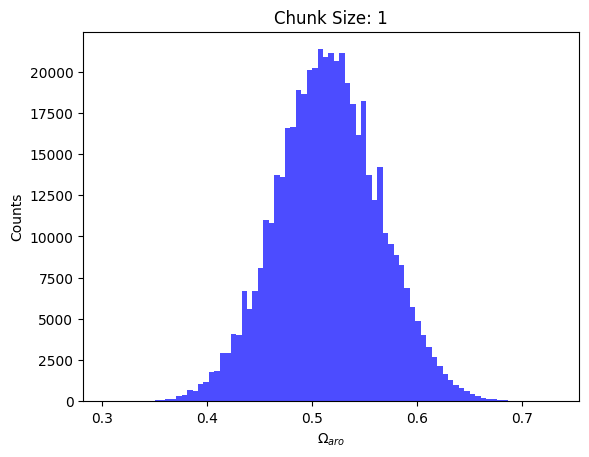

In [ ]:
list_chunk = []
for x in range(500000):
  data = patterning_parameter_dict[chunk_size][x]
  list_chunk.append(data)
array_chunk = np.array(list_chunk)
plt.hist(array_chunk, bins=83, color='blue', alpha=0.7)
plt.title(f'Chunk Size: {chunk_size}')
plt.xlabel(r'$\Omega_{aro}$')
#plt.xlim(0.4, 0.6)
plt.ylabel('Counts')
plt.savefig(f'patterning_histogram_chunk_{chunk_size}.png')
plt.show()